In [1]:
#Chapter 4 - linear data structures 
#Discussion questions
from pythonds3.basic import Stack, Queue


In [2]:
#covert following values to binary using "divide by 2". Show the stack of remainders
def divide_by_base(num, base=2):
    rem_stack = Stack()
    while num > 0:
        rem = num % 2
        rem_stack.push(rem)
        num = num // 2
    
    # bin_str = ''
    # while not rem_stack.is_empty():
    #     bin_str += str(rem_stack.pop())
    return rem_stack._items

print(divide_by_base(17))
print(divide_by_base(45))
print(divide_by_base(96))

[1, 0, 0, 0, 1]
[1, 0, 1, 1, 0, 1]
[0, 0, 0, 0, 0, 1, 1]


#### 2. convert the following infix expressions to prefix (using full parenthesis)
1. (A+B)*(C+D)*(E+F)
2. A+((B+C)*(D+E))
3. A*B*C*D+E+F

***

1. *+AB*+CD+EF 
2. +A*+BC+DE
3. *A*B*CD+E+F

#### 3. convert the above infix operations to postfix (using full parenthesis)
1. AB+CD+*EF+*
2. ABC+DE+*+
3. AB*C*D*E+F+


In [3]:
#4. convert above infix operations to postfix using direct conversion algorithm
def infix_to_postfix(exp):
    prec = {
    "(" : 1, 
    "+" : 2, 
    "-" : 2,
    "*" : 3, 
    '/' : 3,
    }
    stack = Stack()
    postfix = []
    brackets = '()'
    for char in exp:
        if char not in prec and char != ')':
            postfix.append(char)
        
        elif char == '(':
            stack.push(char)
        
        elif char == ')':
            top = stack.pop()
            while top != '(':
                postfix.append(top)
                top = stack.pop()
        
        else:
            # >= for comp here 
            while not stack.is_empty() and prec[stack.peek()] >= prec[char]:
                postfix.append(stack.pop())
            stack.push(char)

    #add remaining operators
    while not stack.is_empty():
        postfix.append(stack.pop())
    return ''.join(postfix)
            
print(infix_to_postfix('(A+B)*(C+D)*(E+F)'))
print(infix_to_postfix('A+((B+C)*(D+E))'))
print(infix_to_postfix('A*B*C*D+E+F'))


        

AB+CD+*EF+*
ABC+DE+*+
AB*C*D*E+F+


In [4]:
#Evaluate the following postfix expressions, show the stack as each operator and operand is processed
def do_operation(operator, operand_1, operand_2):
    assert operator in '+/-*'
    return eval(f'{operand_1} {operator} {operand_2}')

def evaluate_postfix(postfix_exp):
    operand_stack = Stack()
    operators = '+-*/'
    for token in postfix_exp:
        if token not in operators:
            operand_stack.push(token)
        else:
            operand_2 = operand_stack.pop()
            operand_1 = operand_stack.pop()
            res = do_operation(token, operand_1, operand_2)
            operand_stack.push(res)
    
    assert operand_stack.size() == 1
    return operand_stack.pop()

print(evaluate_postfix('23*4+'))
print(evaluate_postfix('12+3+4+5+'))
print(evaluate_postfix('12345*+*+'))


10
15
47


#### 6. The alternative implementation of the Queue ADT is to use a list such that rear of the queue is the end of the list. What would this mean for big-O performance

 enqueue - if rear of queue is at the end of list then enqueue would be a O(1) operation, as it equates to append, versus
 current O(n) complexity given the current insert(0, item) implementation.
 ***
 dequeue - if rear of queue is at the end of list then dequeue would be a O(n) operation, as it equates to .pop(0), versus
 current O(1) complexity given current .pop() implementation. 
 ***
 .size() and .is_empty() operations are not affected



#### What is the result of carrying out both steps of the linked list add method in reverse order? What kind of reference results? What types of problems may result?

def add(self, item): <br>
> temp = Node(item) <br>
> temp.set_next(self.head) **step 1** <br>
> self.head = temp **step 2** <br>

if both steps are carried out in reverse order, step 1 means *self.head* will be set to *temp*, but as *temp*'s next == None, the original references to the linked list will be gone. Then step 2 setting *temp*'s next as *self.head* (which is temp), will lead to a circular reference to temp object itself. If other methods such as search, append, or index which require list traversal are called, it could lead to an infinite loop.

#### 8.Explain how the linked list remove method works when the item to be removed is in the last node.

When the item to be removed is the last node, the remove method will through the whole list, arriving at the final node setting the reference current to be itself and reference previous to second to last node. The previous.next will then be set to current.next which is None, making previous the new final node, thus removing the final node.

#### 9. Explain how the remove method works when the item is in the only node in the linked list.

When the item is the only node in the linked list, current.data == item will be immediate and thus the while loop for list traversal will not occur. At this stage, because previous **is None**, self.head will be set to current.next, which **== None**, thus resulting in an empty list.

In [5]:
#Programming Exercises Chapter 4.27.
#1. modify the infix-to-postfix algorithm so that it can handle errors 
""" possible errors:
1. invalid tokens 
2. consecutive operands/operators
3. unclosed brackets
4. Invalid number of operands/operators
"""
def num_test(s):
    try:
        float(s)
        return True 
    except ValueError:
        return False 


def infix_to_postfix(infix_expr):
    prec = {}
    prec['**'] = 4
    prec["*"] = 3
    prec["/"] = 3
    prec["+"] = 2
    prec["-"] = 2
    prec["("] = 1

    def token_type(token):
        #1
        if token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" + 'ANS' or num_test(token):
            return 'operand'
        elif token in '()':
            return 'bracket'
        elif token in prec:
            return 'operator'
        else:
            raise Exception(f'Invalid Token: "{token}"')

    def check_expression(exp):
        #4
        operators = 0
        operands = 0
        for token in exp:
            if token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" + 'ANS' or num_test(token):
                operands += 1
            if token in prec:
                operators += 1
        if operators != operands - 1:
            raise Exception('Missing operators/operands')
    

    op_stack = Stack()
    postfix_list = []
    token_list = infix_expr.split()
    token_list = list(map(lambda t: t.upper(), token_list))

    for i,token in enumerate(token_list):
        #2. consecutive operands/operators
        if i > 0:
            if token_type(token) == token_type(token_list[i-1]) and token_type(token) != 'bracket':
                raise Exception(f'Consecutive {token_type(token)}s')

        if token in "ABCDEFGHIJKLMNOPQRSTUVWXYZ" + 'ANS' or num_test(token):
            postfix_list.append(token)
        elif token == "(":
            op_stack.push(token)
        elif token == ")":
            #3
            if op_stack.is_empty():
                raise Exception('Unclosed Bracket')

            top_token = op_stack.pop()
            while top_token != "(" and not op_stack.is_empty():
                postfix_list.append(top_token)
                top_token = op_stack.pop()

            if top_token != '(':
                raise Exception('Unclosed Bracket')
        else:

            while (not op_stack.is_empty()) and (prec[op_stack.peek()] >= prec[token]):
                postfix_list.append(op_stack.pop())
            op_stack.push(token)

    while not op_stack.is_empty():
        postfix_list.append(op_stack.pop())

    check_expression(postfix_list)

    return " ".join(postfix_list)

print(infix_to_postfix('( ( b + c ) )'))

B C +


In [6]:
#2. Modify the postfix evaluation algorithm so that it can handle errors.
""" 
possible errors:
1. check that final size of operand stack is 1, or else there is an error in the expression
"""
def postfix_eval(postfix_expr, prev_ans=None):
    operand_stack = Stack()
    token_list = postfix_expr.split()

    if 'ANS' in token_list and prev_ans is None:
        raise RuntimeError('ANS used but no previous answer stored.')

    if prev_ans is not None:
        token_list = map(lambda x: x if x != 'ANS' else prev_ans, token_list)

    for token in token_list:
        if num_test(token):
            operand_stack.push(int(token))
        else:
            operand2 = operand_stack.pop()
            operand1 = operand_stack.pop()
            try:
                result = eval(f"{operand1} {token} {operand2}")
            except ZeroDivisionError:
                print('Division by zero!')
                return None
                
            operand_stack.push(result)
    
    if operand_stack.size() != 1:
        raise Exception('Invalid expression')
    return operand_stack.pop()


In [7]:
#Implement a direct infix evaluator that combines the functionality of infix-to-postfix conversion 
# and the postfix evaluation algorithm. 
# Your evaluator should process infix tokens from left to right and use two stacks, 
# one for operators and one for operands, to perform the evaluation.
def direct_infix_evaluator(expression, prev_ans=None):
    postfix = infix_to_postfix(expression)
    result = postfix_eval(postfix, prev_ans)
    return result

direct_infix_evaluator('3 ** 2')

9

In [8]:
#Turn your direct infix evaluator from the previous problem into a calculator.

def calculator():
    #take input and run direct_infix_evaluator
    run = True
    i = 0
    while run:
        if i == 0:
            prev_ans = None 
            print('(Submit EXIT to exit)')
            print('(If you would like to use the previous result please use ANS as a variable)')

        print('Please enter an expression: ')
        exp = input()
        if exp == 'EXIT':
            break 
        try:
            ans = direct_infix_evaluator(exp, prev_ans) 
            print(f'{exp} = {ans}')
            prev_ans = ans
        except Exception as e:
            print('ERROR: ' + str(e))
        
        i += 1
    print('**** Calculator Closing! ****')
calculator()



(Submit EXIT to exit)
(If you would like to use the previous result please use ANS as a variable)
Please enter an expression: 
99 + 2 = 101
Please enter an expression: 
ANS ** 2 = 10201
Please enter an expression: 
**** Calculator Closing! ****


In [9]:
#5. Implement the Queue ADT, using a list such that the rear of the queue is at the end of the list.

class Queue_2:
    def __init__(self):
        self._items = []
    def enqueue(self, item):
        self._items.append(item)
    def dequeue(self):
        return self._items.pop(0)
    def is_empty(self):
        return not bool(len(self._items))
    def size(self):
        return len(self._items)

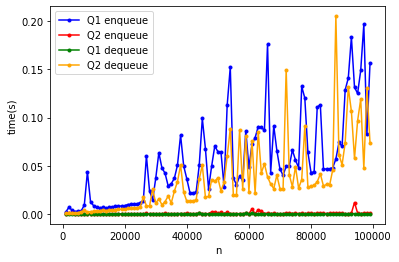

In [10]:
# Design and implement an experiment to 
# do benchmark comparisons of the two queue implementations. What can you learn from such an experiment?
#First compare 
from timeit import Timer
import matplotlib.pyplot as plt
X = []
Y1 = []#Queue enqueue
Y2 = [] #Queue2 enqueue
Y3 = []
Y4 = []
number = 1000
for size in range(1000, 100_000, 1_000):
    x1 = Queue()
    x2 = Queue_2()
    x1._items = list(range(size))
    x2._items = list(range(size))
    t1 = Timer(f"x1.enqueue(1)", "from __main__ import x1")
    t2 = Timer(f"x2.enqueue(1)", "from __main__ import x2")
    Y1.append(t1.timeit(number=number))
    Y2.append(t2.timeit(number=number))
    x1._items = list(range(size))
    x2._items = list(range(size))
    t3 = Timer(f"x1.dequeue()", "from __main__ import x1")
    t4 = Timer(f"x2.dequeue()", "from __main__ import x2")
    Y3.append(t3.timeit(number=number))
    Y4.append(t4.timeit(number=number))
    X.append(size)

plt.plot(X, Y1, color='blue', marker='.', label='Q1 enqueue')
plt.plot(X, Y2, color='red', marker='.', label='Q2 enqueue')
plt.plot(X, Y3, color='green', marker='.', label='Q1 dequeue')
plt.plot(X, Y4, color='orange', marker='.', label='Q2 dequeue')

plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()


## Comparison of Queue and Queue_2
The difference in implementation of Queue and Queue_2 (rear of queue either at start or end of list) results in the complexity of enqueue and dequeue to be swapped for the respective ADTs. In Queue, where the rear of the list was the front, enqueue would be equivalent to insert(0, item), which is a O(n) operation. This would be equivalent to dequeue in Queue_2 which is pop(0), which is also O(n). This is seen in the plot in the blue and orange lines. In Queue, dequeue is equivalent to pop(), an O(1) operation, of which it's time complexity is equivalent to Queue_2's enqueue, append(item), which is also O(1). Other operations in size and is_empty are the same.

In [11]:
#7.It is possible to implement a queue such that both enqueue and dequeue have 𝑂(1) performance on average. 
# In this case it means that most of the time enqueue and dequeue will be 𝑂(1) except in one particular circumstance 
# where dequeue will be 𝑂(𝑛). Create an implementation of a queue that would have an average performance of 𝑂(1) for 
# enqueue and dequeue operations.

#Linked list seems to fit here - using the head of the list to dequeue and adding nodes to tail of list ?
class Node:
    def __init__(self, val=None, _next=None):
        self.val = val
        self._next = _next

class Queue_3:
    def __init__(self):
        #This linked list implementation is a bit of a hybrid between singly and doubly linked list b/c of additional
        #tail reference. Another way to get O(1) enqueue and dequeue is using deque class in python!
        self.head = None 
        self.tail = None 
        self.size = 0
        #rear of queue is head of linked list
    def enqueue(self, item):
        node = Node(item)
        if self.size == 0:
            self.head = node 
            self.tail = node 
        elif self.size >= 1:
            self.tail._next = node 
            self.tail = node
        self.size += 1

    def dequeue(self):
        if self.size == 0:
            print('Queue is Empty')
            return None
        
        if self.size > 1:
            new_head = self.head._next
            removed = self.head 
            self.head = new_head
            self.size -= 1
        else:
            removed = self.head 
            self.head = None
            self.tail = None 
        return removed.val


queue = Queue_3()
vals = [3, 2, 1]
for val in vals:
    queue.enqueue(val)
for i in range(len(vals)):
    assert queue.dequeue() == vals[i]

assert queue.head == None and queue.tail == None

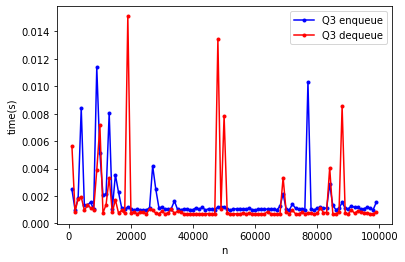

In [12]:
from timeit import Timer
import matplotlib.pyplot as plt
import random
X = []
Y1 = []#Queue3 enqueue
Y2 = [] #Queue3 dequeue
number = 1_000
for size in range(1_000, 100_000, 1_000):
    x1 = Queue_3()
    for _ in range(size):
        x1.enqueue(random.random())

    t1 = Timer(f"x1.enqueue(random.random())", "from __main__ import x1, random")
    Y1.append(t1.timeit(number=number))
    t2 = Timer(f"x1.dequeue()", "from __main__ import x1")
    Y2.append(t2.timeit(number=number))
    X.append(size)

plt.plot(X, Y1, color='blue', marker='.', label='Q3 enqueue')
plt.plot(X, Y2, color='red', marker='.', label='Q3 dequeue')

plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()

In [13]:
class Customer:
    def __init__(self, time, avg_basket_size=20, avg_item_duration=3, cash_duration=3, card_duration=1,
    payment=None):
        self.timestamp = time 
        #basket size
        self.basket_size = (1 - random.gauss(0, 1)) * avg_basket_size
        self.payment_method = payment
        self.payment_duration = cash_duration if self.payment_method == 'cash' else card_duration
        self.basket_duration = self.basket_size * (1-random.gauss(0,1)) * avg_item_duration + self.payment_duration

    def get_stamp(self):
        return self.timestamp
    
    def get_basket(self):
        return self.basket_duration

    def get_payment_method(self):
        return self.payment_method

    def wait_time(self, current_time):
        return current_time - self.timestamp


In [14]:
class PaymentTill:
    def __init__(self, max_dps=3, payment_method=None):
        self.payment_method = payment_method
        self.max_dps = max_dps
        self.dps = self.get_dps()
        self.current_customer = None 
        self.time_remaining = None 
    
    def get_dps(self):
        if self.payment_method == 'card':
            return self.max_dps 
        else:
            return random.uniform(0.5, 1) * self.max_dps 

    def tick(self):
        if self.current_customer is not None:
            self.time_remaining = self.time_remaining - self.dps
            if self.time_remaining <= 0:
                self.current_customer = None 
    
    def busy(self):
        return self.current_customer is not None 
    
    def start_next(self, new_customer):
        self.current_customer = new_customer
        self.time_remaining = new_customer.get_basket()

In [15]:
class PaymentArea:
    def __init__(self, n_cash, n_card, max_dps):
        self.cash_payments = [PaymentTill(max_dps=max_dps)] * n_cash 
        self.card_payments = [PaymentTill(max_dps=max_dps)] * n_card 

    def tick(self):
        for cash in self.cash_payments:
            cash.tick()
        for card in self.card_payments:
            card.tick()

    def start_free_till(self, customer):
        if customer.get_payment_method() == 'cash':
            for cash in self.cash_payments:
                if not cash.busy():
                    cash.start_next(customer)
                    return True 
        elif customer.get_payment_method() == 'card':
            for card in self.card_payments:
                if not card.busy():
                    card.start_next(customer)
                    return True
        
        return False 


In [16]:
class SimQueue(Queue_2):
    #queue for simulation that has additional peek method for convenience
    def __init__(self):
        super().__init__()
    
    def peek(self):
        return self._items[0]

In [17]:
def spawn_customer(spawn_rate):
    #spawn_rate per minute 
    num = random.randint(1, 60//spawn_rate)
    return num == 60//spawn_rate

def customer_payment(customer_cash_prob):
    if random.uniform(0, 1) < customer_cash_prob:
        return 'cash'
    return 'card'

def simulation(run_time=3600, 
avg_basket_size=20, avg_item_duration=4, cash_duration=3, card_duration=1, 
max_dps=3, n_cash=3, n_card=3, customer_spawn_rate=5, customer_cash_prob=0.25):
    #run time in seconds 
    queue = SimQueue()
    payment_area = PaymentArea(n_cash, n_card, max_dps)
    waiting_times = []

    for current in range(run_time):
        if spawn_customer(customer_spawn_rate):
            customer = Customer(current, avg_basket_size=avg_basket_size, avg_item_duration=avg_item_duration,
            cash_duration=cash_duration, card_duration=card_duration, payment=customer_payment(customer_cash_prob))
            
            queue.enqueue(customer)
        
        if not queue.is_empty():
            #check current customer's payment method 
            next_customer = queue.peek()
            started = payment_area.start_free_till(next_customer)
            if started:
                queue.dequeue()
                waiting_times.append(next_customer.wait_time(current))
        
        payment_area.tick()
        
    average_wait = sum(waiting_times)/len(waiting_times)
    return average_wait, queue.size()
                

Text(0.5, 1.0, 'customers remaining (n)')

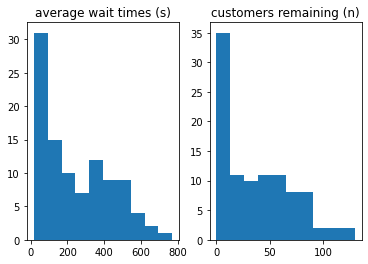

In [18]:
avg_wait_times = []
customers_remaining = []
for _  in range(100):
    wait_times, remaining = simulation(3600)
    avg_wait_times.append(wait_times)
    customers_remaining.append(remaining)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.hist(avg_wait_times)
ax2.hist(customers_remaining)
ax1.set_title('average wait times (s)')
ax2.set_title('customers remaining (n)')


8. Consider a real life situation. Formulate a question and then design a simulation that can help to answer it.
Be sure to state any assumptions that you make and provide any probabilistic data that must be considered as part of the scenario.

The above simulation is of a grocery store payment till, to see how different configurations affect customer wait times. The configurations include:

    - avg_basket_size: determines average basket size in a gaussian distribution 
    - avg_item_duration: how long it takes on average to process an item - to introduce variability to customer processing time - also a gaussian distribution 
    - cash_duration: duration in secs/ticks it takes to process the payment of the basket if cash payment 
    - card_duration: duration in secs/ticks it takes to process the payment of the basket if card payment - typically less than card_duration 
    - max_dps: max basket duration that can be consumed by each tick at the till. For card tills the max_dps is always used (assumed self checkout is more efficient), where as cash tills because of human processing there is a level of variability introduced, where till can be up to 50% slower than card till 
    - n_cash: number of cash tills at payment area 
    - n_card: number of card tills at payment area 
    - customer_spawn_rate: customer spawned per minute on average 
    - customer_cash_prob: proportion of customers that use cash payment 

Different experimental conditions can also be modelled such as creating a second cash cue that cash customers can move to to prevent blockage. How does increasing the speed of cash vs card tills affect speed? Including simulation of incidents such as misscanned items at card tills which introduces delays, etc! 

In [19]:
# 9. Modify the Hot Potato simulation to allow for a randomly chosen counting value so 
# that each pass is not predictable from the previous one.
def modified_hot_potato(name_list, max_num=10):
    sim_queue = Queue()
    for name in name_list:
        sim_queue.enqueue(name)

    while sim_queue.size() > 1:
        #randomly generate num
        num = random.randint(1, max_num)
        for _ in range(num):
            sim_queue.enqueue(sim_queue.dequeue())

        sim_queue.dequeue()

    return sim_queue.dequeue()

In [20]:
modified_hot_potato(['bill', 'bob', 'jack', 'jill', 'joe', 'edan', 'holly'])

'joe'

In [21]:
# 10. Implement a radix sorting machine 
def radix_sort(nums, descending=True):
    def get_digit(num, place):
        for _ in range(place):
            num = num // 10
        return num % 10 
    #set up all the bins 
    main_bin = Queue()
    digit_bins = [Queue() for _ in range(10)]
    max_len = 0
    if descending:
        bin_order = range(10)
    else:
        bin_order = range(9, -1, -1)

    #load main bin and get max num's n digits
    for n in nums:
        n_digits = len(str(n))
        max_len = max(max_len, n_digits)
        main_bin.enqueue(n)
    #start sorting
    for place in range(max_len):
        while not main_bin.is_empty():
            next_num = main_bin.dequeue()
            digit_bins[get_digit(next_num, place)].enqueue(next_num) 
        
        for bin in bin_order:
            curr_bin = digit_bins[bin]
            while not curr_bin.is_empty():
                main_bin.enqueue(curr_bin.dequeue())
    
    return main_bin._items 

radix_sort([75, 12, 200, 1000, 2, 1, 24, 8, 0], descending=False)


[0, 1, 2, 8, 12, 24, 75, 200, 1000]

In [22]:
#11. write a program that can check an HTML document for proper opening and closing tags
#can handle tags opened across multiple lines and tags with attributes
def check_html_tags(html):
    def get_tags(string):
        tags = []
        in_tag = False
        in_tag_name = False 
        curr = ''
        for char in string:
            if char == '<':
                in_tag = True 
                in_tag_name = True 
            elif char == '>':
                if in_tag:
                    tags.append(curr)
                    curr = ''
                    in_tag = False 
            else:
                if in_tag:
                    if char == ' ':
                        in_tag_name = False 
                    if in_tag_name:
                        curr += char 
        return tags


    tag_stack = Stack()
    #don't split html into lines - or else cant handle tags that are open across multiple lines
    tags = get_tags(html)
    #for i, line in enumerate(tags):
    #    print(line)
    for tag in tags:
        if tag[0] != '/' and tag not in ['head', 'link'] and tag[0] != '!':
            tag_stack.push(tag)
        elif tag[0] == '/':
            top_tag = tag_stack.pop()
            if tag[1:] != top_tag:
                print(f'<{tag}> before <{top_tag}> closed')
                return False
                    
    if tag_stack.size() != 0:
        while not tag_stack.is_empty():
            rem = tag_stack.pop()
            print(f'<\{rem}> missing')
        return False 
        
    return True
    

In [23]:
check_html_tags(
"""
<div id="main-content" style="display: none;">
    <h1 class="search-title">Watchlist</h1>

    <div id="table-div">
        <p id="empty-message" style="text-align: center; display: none;">
            Your watchlist is currently empty!
        </p>

    <!--put form here so that + button displays it?-->
</div>

""")

<\div> missing


False

In [24]:
# 12. Extend the program from listing 2.15 to handle palindromes with spaces.
from pythonds3.basic import Deque

def modified_palindrome_checker(a_string):
    char_deque = Deque()

    for ch in a_string:
        #ignore space
        if ch != ' ':
            char_deque.add_rear(ch)

    while char_deque.size() > 1:
        first = char_deque.remove_front()
        last = char_deque.remove_rear()
        if first != last:
            return False

    return True

In [25]:
modified_palindrome_checker('I PREFER PI')

True

In [26]:
class LinkedList:
    def __init__(self):
        self.head = None 
        self.tail = None 
        self._size = 0 
    
    def is_empty(self):
        return self.head == None
    
    def size(self):
        return self._size

    def pop(self, pos=None):
        #O(n)
        if pos is None:
            pos = self._size-1
        
        if pos < 0:
            pos = self._size + pos 
            
        assert 0 <= pos < self._size

        current = self.head
        for _ in range(pos):
            prev = current 
            current = current._next

        if pos == 0:
            self.head = current._next 
        elif 0 < pos < self._size:
            prev._next = current._next 
        else:
            prev._next = None 
        
        self._size -= 1
        return current.val

    def slice(self, start, stop):
        if start < 0:
            start = self._size + start 
        if stop < 0:
            stop = self._size + stop 
        assert stop > start 
        slc = []
        current = self.head 
        for i in range(self._size):
            if i == stop:
                break
            if i >= start:
                slc.append(current.val)
            current = current._next 
        return slc 

    def __str__(self):
        #show all the elements within the list
        lst = []
        current = self.head
        for _ in range(self._size):
            lst.append(current.val)
            current = current._next
        #just convert lst to str to print with square brackets
        return str(lst)

    def __iter__(self):
        #make object iterable - 
        lst = []
        current = self.head
        for _ in range(self._size):
            lst.append(current.val)
            current = current._next 
        return iter(lst)

In [27]:
# 13.  To implement the size method, we counted the number of nodes in the list. 
# An alternative strategy would be to store the number of nodes in the list as an additional 
# piece of data in the head of the list. 
# Modify the UnorderedList class to include this information and rewrite the size method.

# 14. Implement the remove method so that it works correctly in the case where the item is not in the list.
# 16. Implement the __str__ method in the UnorderedList class. What would be a good string representation for a list?
# 17. Implement __str__ method so that lists are displayed the Python way (with square brackets)
# 18. Implement the remaining operations defined in the UnorderedList ADT (append, index, pop, insert).
# 19. Implement a slice method for the UnorderedList class. It should take two parameters, start and stop, 
# and return a copy of the list starting at the start position and going up to but not including the 
# stop position.
class UnorderedList(LinkedList):
    def __init__(self):
        super().__init__()

    def add(self, item):
        temp = Node(item)
        temp._next = self.head
        self.head = temp
        if self.head._next is None:
            self.tail = self.head
        #update size
        self._size += 1

    def search(self, item):
        current = self.head
        for _ in range(self._size):
            if current.val == item:
                return True 
            current = current._next 
        return False 
        
    def append(self, item):
        temp = Node(item)
        if self.head is None:
            self.head = temp
            self.tail = temp
        else:
            self.tail._next = temp
            self.tail = self.tail._next
        
        self._size += 1
        

    def insert(self, pos, item):
        if pos < 0:
            pos = self._size + pos + 1
        assert 0 <= pos <= self._size 
        node = Node(item)
        current = self.head 
        for _ in range(pos):
            prev = current
            current = current._next 
    
        if pos == 0:
            node._next = self.head 
            self.head = node 
        elif 0 < pos < self._size:
            prev._next = node 
            node._next = current
        else:
            prev._next = node 
            
        self._size += 1

    def index(self, item):
        #return the index of first occurrence of the item - O(n)
        current = self.head
        for i in range(self._size):
            if current.val == item:
                return i 
            current = current._next
        raise ValueError('Item not in list')

    def remove(self, item):
        current = self.head
        previous = None

        for _ in range(self._size):
            if current.val == item:
                break 
            previous = current 
            current = current._next
        
        if current is None:
            raise ValueError('Item not in list')

        if previous is None:
            #first item is val
            self.head = current._next
        else:
            previous._next = current._next

        self._size -= 1


        


In [28]:
lst = UnorderedList()
print('append')
lst.append(2)
lst.append(2)
lst.append(5)

print('add')
lst.add(9)
lst.add(0)
print(lst)

print('remove 2')
lst.remove(2)
try:
    lst.remove(99)
except Exception as e:
    print('remove 99: ', e)
print('search')
print('99: ', lst.search(99))
print('5: ', lst.search(5))
print('is_empty')
print(lst.is_empty())
print('size')
print(lst)
print(lst.size())
print('index')
print('2: ', lst.index(2))
try:
    lst.index(999)
except Exception as e:
    print('999: ', e)
print('insert')
lst.insert(-1, 99)
lst.insert(0, 35)
lst.insert(1, 66)
print(lst) 
print('pop')
print(lst.pop(-1))
print(lst.pop(0))


append
add
[0, 9, 2, 2, 5]
remove 2
remove 99:  Item not in list
search
99:  False
5:  True
is_empty
False
size
[0, 9, 2, 5]
4
index
2:  2
999:  Item not in list
insert
[35, 66, 0, 9, 2, 5, 99]
pop
99
35


In [29]:
# 15. Modify the list classes to allow duplicates. Which methods will be impacted by this change?
# if by duplicates meaning duplicate numbers/values, then:
# no methods in UnorderedList are affected 
# no methods in OrderedList are affected
# issue can however arise if a user tries to add a repeated node object into the list,
# which can cause recursion within the list
# 20. Implement the remaining operations defined in the OrderedList ADT (index, )
class OrderedList(LinkedList):
    def __init__(self):
        super().__init__()
    
    def search(self,item):
        current = self.head
        while current is not None:
            if current.val == item:
                return True
            if current.val > item:
                return False
            current = current._next
        return False

    def add(self, item):
        """Add a new node"""
        current = self.head
        previous = None
        temp = Node(item)

        while current is not None and current.val < item:
            previous = current
            current = current._next

        if previous is None:
            temp._next = self.head
            self.head = temp
        else:
            temp._next = current
            previous._next = temp
        
        self._size += 1

    def index(self, item):
        current = self.head
        for i in range(self._size):
            if current.val == item:
                return i 
            
            if current.val > item:
                break
            current = current._next
        raise ValueError('Item not in list')

    def remove(self, item):
        current = self.head
        previous = None

        for _ in range(self._size):
            if current.val == item:
                break 
            if current.val > item:
                raise ValueError('Item not in list')
                
            previous = current 
            current = current._next
        
        if current is None:
            raise ValueError('Item not in list')

        if previous is None:
            #first item is val
            self.head = current._next
        else:
            previous._next = current._next

        self._size -= 1
        
        

In [30]:
olst = OrderedList()
print('add')
olst.add(9)
olst.add(0)
olst.add(25)
olst.add(24)
olst.add(100)
print(olst)

print('remove 25')
olst.remove(25)
try:
    olst.remove(99)
except Exception as e:
    print('remove 99: ', e)
print('search')
print('99: ', olst.search(99))
print('24: ', olst.search(24))
print('is_empty')
print(olst.is_empty())
print('size')
print(olst)
print(olst.size())
print('index')
print('0: ', olst.index(0))
try:
    olst.index(999)
except Exception as e:
    print('999: ', e)

print(olst) 
print('pop')
print('pop -1: ', olst.pop(-1))
print('pop 0: ', olst.pop(0))


add
[0, 9, 24, 25, 100]
remove 25
remove 99:  Item not in list
search
99:  False
24:  True
is_empty
False
size
[0, 9, 24, 100]
4
index
0:  0
999:  Item not in list
[0, 9, 24, 100]
pop
pop -1:  100
pop 0:  0


21. Consider the relationship between Unordered and Ordered lists. 
Is it possible that inheritance could be used to build a more efficient implementation? 
Implement this inheritance hierarchy.

Hierarchy is implemented using BaseList class, to store common operations such as pop, size, __str__, slice, is_empty. More class specific implementations such as search and add are then for the respective list types implemented after inheriting BaseList class.

In [31]:
class BasicBase:
    def __init__(self):
        #base class for queue and stacks
        self.items = UnorderedList()
        
    def is_empty(self):
        return self.items.is_empty()
    
    def size(self):
        return self.items.size()

    def __iter__(self):
        return iter(self.items)

    def __str__(self):
        return str(self.items)

In [32]:
#22. Implement a stack using linked lists.

class LinkedListStack(BasicBase):
    def __init__(self):
        #head of list is top of the stack, and tail of list is rear of stack
        super().__init__()
    
    def push(self, item):
        self.items.add(item)

    def pop(self):
        return self.items.pop(0)
    
    def peek(self):
        return self.items.head.val 



In [33]:
stack_2 = LinkedListStack()
print('push: 2, bob, 99')
stack_2.push(2)
stack_2.push('bob')
stack_2.push(99)
print(stack_2)
print('pop x 2')
print(stack_2.pop())
print(stack_2.pop())
print('peek: ', stack_2.peek())
print('is_empty: ', stack_2.is_empty())
print('size: ', stack_2.size())

push: 2, bob, 99
[99, 'bob', 2]
pop x 2
99
bob
peek:  2
is_empty:  False
size:  1


In [34]:
# 23. Implement a queue using linked lists

class LinkedListQueue(BasicBase):
    def __init__(self):
        #head of the queue = head of the list, rear of the queue = tail of list 
        super().__init__()
    
    def enqueue(self, item):
        self.items.append(item)
    
    def dequeue(self):
        return self.items.pop(0)
    
    

In [35]:
llq = LinkedListQueue()
print('enqueue 99, 25, 24, bob')
llq.enqueue(99)
llq.enqueue(25)
llq.enqueue(24)
llq.enqueue('bob')
print(llq)
print('dequeue x 2')
print(llq.dequeue())
print(llq.dequeue())
print(llq)
print('size: ', llq.size())
print('is_empty: ', llq.is_empty())


enqueue 99, 25, 24, bob
[99, 25, 24, 'bob']
dequeue x 2
99
25
[24, 'bob']
size:  2
is_empty:  False


In [36]:
# 24. Implement a deque using linked list 
class LinkedListDeque(BasicBase):
    def __init__(self):
        #add_front, add_rear, remove_front, remove_rear
        #head of list is head of deque, tail of list is rear of deque
        super().__init__()
    
    def add_front(self, item):
        self.items.add(item)
    
    def add_rear(self, item):
        self.items.append(item)
    
    def remove_front(self):
        return self.items.pop(0)
    
    def remove_rear(self):
        return self.items.pop()

In [37]:
dq = LinkedListDeque()
print('add front: bob, 99, 24')
dq.add_front('bob')
dq.add_front(99)
dq.add_front(24)
print(dq)
print('add rear: 3, 8, 81')
dq.add_rear(3)
dq.add_rear(8)
dq.add_rear(81)
print(dq)
print('remove front x 2')
print(dq.remove_front())
print(dq.remove_front())
print('remove rear x 1')
print(dq.remove_rear())
print('is_empty: ', dq.is_empty())
print('size: ', dq.size())
print(dq)

add front: bob, 99, 24
[24, 99, 'bob']
add rear: 3, 8, 81
[24, 99, 'bob', 3, 8, 81]
remove front x 2
24
99
remove rear x 1
81
is_empty:  False
size:  3
['bob', 3, 8]


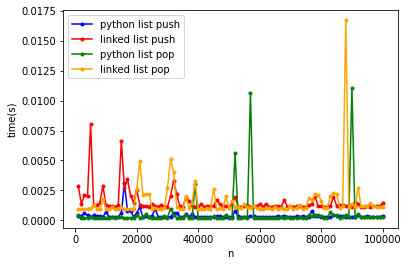

In [38]:
# 26.Design and implement an experiment that will compare the performance of the Python list 
# based stack and queue with the linked list implementation.
#Compare stacks - compare push and pop
X = []
Y1 = []# pystack push
Y2 = [] # llstack push
Y3 = [] # pystack pop 
Y4 = [] # llstack pop
number = 1_000
for size in range(1_000, 100_001, 1_000):
    #test push 
    x1 = Stack()
    x2 = LinkedListStack()

    t1 = Timer(f"x1.push(random.random())", "from __main__ import x1, random")
    Y1.append(t1.timeit(number=number))
    t2 = Timer(f"x2.push(random.random())", "from __main__ import x2, random")
    Y2.append(t2.timeit(number=number))
    X.append(size)

for size in range(1_000, 100_001, 1_000):
    x1 = Stack()
    x2 = LinkedListStack()
    #test pop
    for _ in range(size):
        x1.push(random.random())
        x2.push(random.random())
    
    t3 = Timer(f"x1.pop()", "from __main__ import x1")
    Y3.append(t3.timeit(number=number))
    t4 = Timer(f"x2.pop()", "from __main__ import x2")
    Y4.append(t4.timeit(number=number))

plt.plot(X, Y1, color='blue', marker='.', label='python list push')
plt.plot(X, Y2, color='red', marker='.', label='linked list push')
plt.plot(X, Y3, color='green', marker='.', label='python list pop')
plt.plot(X, Y4, color='orange', marker='.', label='linked list pop')

plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()

Comparing python list and linked list implementations of Stack, we can see that the time complexity of both push and pop methods of both implementations are O(1). This is due to the because in both stack implementations these operations push and pop involve O(1) operations: 

python list: \
push = list.append() - O(1)  \
pop = list.pop() = O(1) \
linked list: \
push = linked_list.add() (adding item to head of list which only involves set operations in switching head nodes and appending prev list to new head) - O(1) \
pop = linked_list.pop(0) (linked list pop 0 only involves set operations inmaking second node new head and returning original head node) = O(1) 


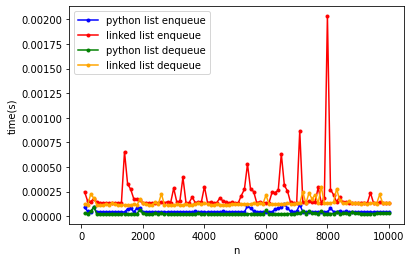

In [39]:
#Compare queues - compare enqueue, dequeue
X = []
Y1 = []# pyqueue enqueue
Y2 = [] # llqueue enqueue
Y3 = [] # pyqueue dequeue 
Y4 = [] # llqueue dequeue
number = 1_00
for size in range(1_00, 100_01, 1_00):
    #test enqueue 
    x1 = Queue()
    x2 = LinkedListQueue()

    t1 = Timer(f"x1.enqueue(random.random())", "from __main__ import x1, random")
    Y1.append(t1.timeit(number=number))
    t2 = Timer(f"x2.enqueue(random.random())", "from __main__ import x2, random")
    Y2.append(t2.timeit(number=number))
    X.append(size)

for size in range(1_00, 10_001, 1_00):
    #test dequeue
    x1 = Queue()
    x2 = LinkedListQueue()
    for _ in range(size):
        x1.enqueue(random.random())
        x2.enqueue(random.random())
    
    t3 = Timer(f"x1.dequeue()", "from __main__ import x1")
    Y3.append(t3.timeit(number=number))
    t4 = Timer(f"x2.dequeue()", "from __main__ import x2")
    Y4.append(t4.timeit(number=number))

plt.plot(X, Y1, color='blue', marker='.', label='python list enqueue')
plt.plot(X, Y2, color='red', marker='.', label='linked list enqueue')
plt.plot(X, Y3, color='green', marker='.', label='python list dequeue')
plt.plot(X, Y4, color='orange', marker='.', label='linked list dequeue')

plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()


Comparing python list and linked list implemtnation of queues, at first glance it seems that the time complexity for enqueue operations are both O(1) for both implementations. However, in python list operation the enqueue method uses list.insert(0, item), which is an O(n) operation, so we would've expected to see linear growth in run time. This is in contrast with linked list operation where enqueue is linked_list.append(item), which is a O(1) operation. This may be due to the small n sizes sampled, where typically native python operations are more optimized and so the difference may not be reflected in this experiment. This is hinted by the fact that larger sampled n sizes causes much longer experiment run times. 

Comparing dequeue operations, again it seems that for both implementations the time complexitie are O(1). Given python list operation for dequeue uses list.pop(), and linked list operation for dequeue uses linked_list.pop(0), which is also O(1), this aligns with our expectations.

In [41]:
# 27. The linked list implementation given above is called a singly linked list because each node 
# has a single reference to the next node in sequence. An alternative implementation is known as a doubly linked list. 
# In this implementation, each node has a reference to the next node (commonly called next) as well as a reference to the 
# preceding node (commonly called back). The head reference also contains two references, 
# one to the first node in the linked list and one to the last. Code this implementation in Python.
class DoublyLinkedNode:
    def __init__(self, value):
        self._val = value 
        self._next = None 
        self._prev = None 

    #I guess this can reduce confusion between methods and actual attribute with similar name?
    def get_val(self):
        return self._val 
    def set_val(self, node_val):
        self._val = node_val 
    val = property(get_val, set_val)

    def get_next(self):
        return self._next 
    def set_next(self, next_node):
        self._next = next_node 
    next = property(get_next, set_next)

    def get_prev(self):
        return self._prev 
    def set_prev(self, prev_node):
        self._prev = prev_node 
    prev = property(get_prev, set_prev)


Doubly Linked List Base is same as current linked list implementation (b/c accidentally included tail reference
in singly linked list to make it more efficient in previous problem)
- DoublyLinkedLists would have advantage of simplifying  methods that requires 
previous node pointer for bookkeeping. Also improves time complexity for methods that originally requires traversal
of the list, such as append in unorderedlist. Other methods such as pop, or index, can also see improvement by 
opting to traverse backwards from end of list for indices closer to end of list (although in terms of big-O it would be considered the same, as originally worse case it would be O(n), and new worse case would be O(n/2), but big-O ignores coefficients)